In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

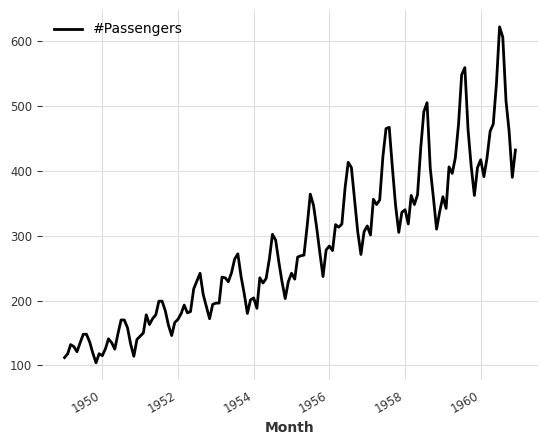

In [6]:
# Read a pandas DataFrame
df = pd.read_csv("dump/data/AirPassengers.csv", delimiter=",")
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")
series.plot()

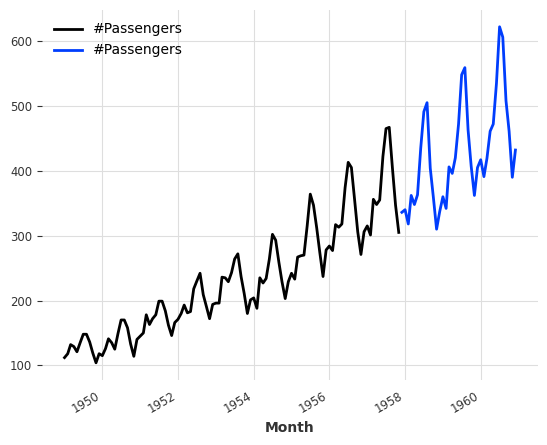

In [7]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

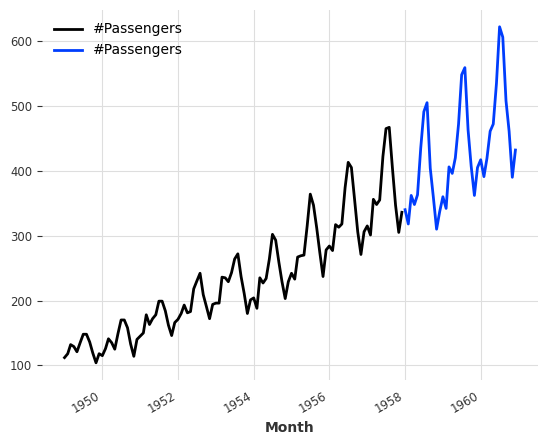

In [8]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()

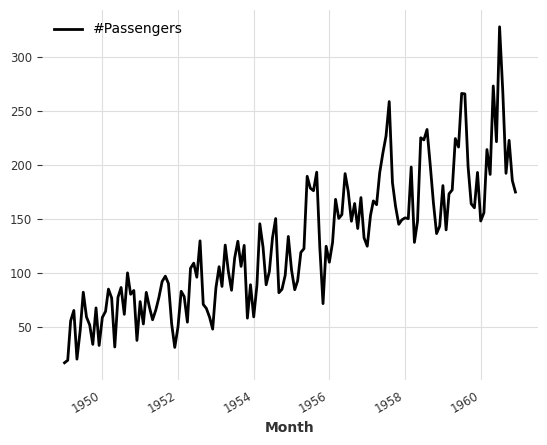

In [9]:
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
(series / 2 + 20 * series_noise - 10).plot()

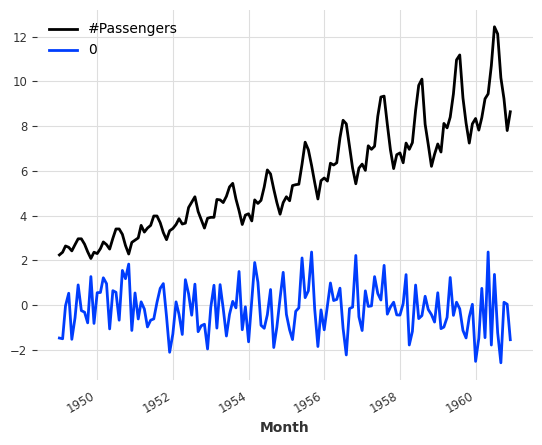

In [10]:
(series / 50).stack(series_noise).plot()

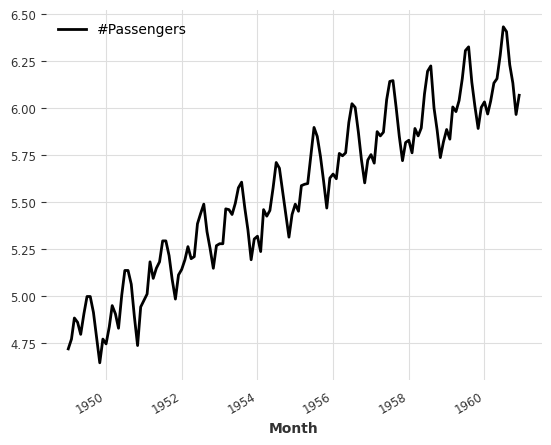

In [11]:
series.map(np.log).plot()

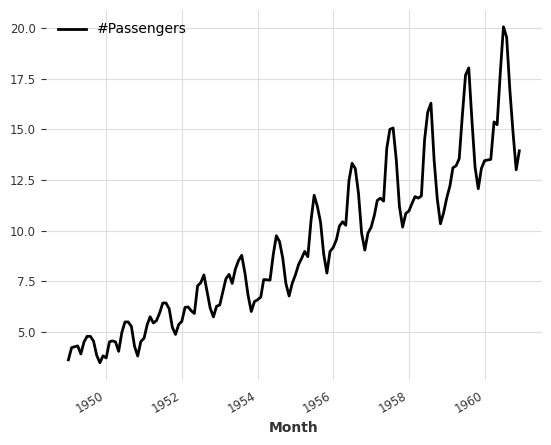

In [12]:
series.map(lambda ts, x: x / ts.days_in_month).plot()

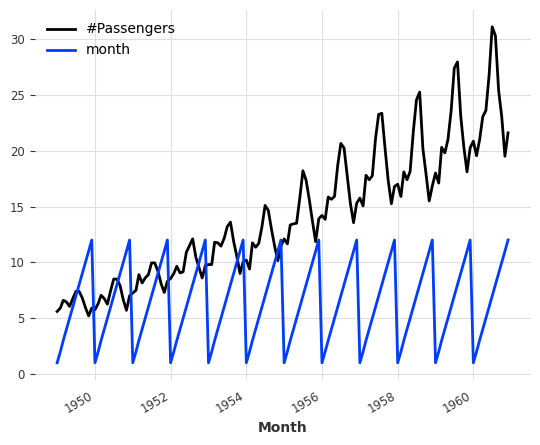

In [13]:
(series / 20).add_datetime_attribute("month").plot()

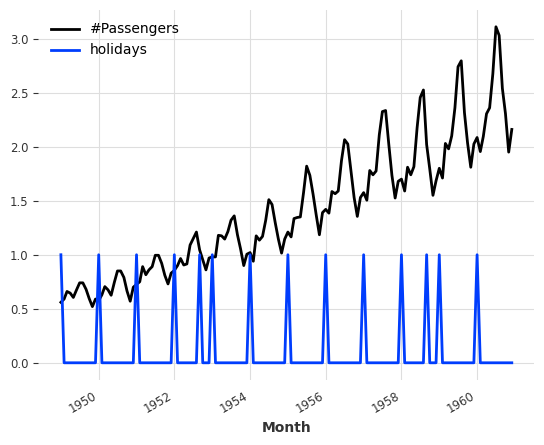

In [14]:
(series / 200).add_holidays("US").plot()

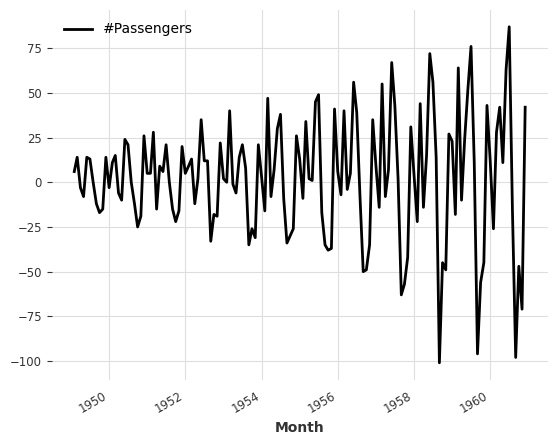

In [15]:
series.diff().plot()

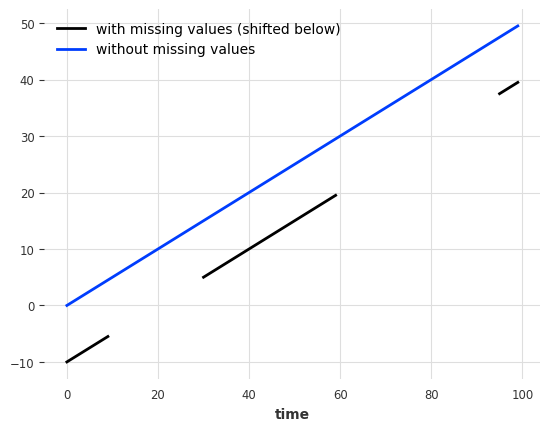

In [16]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")

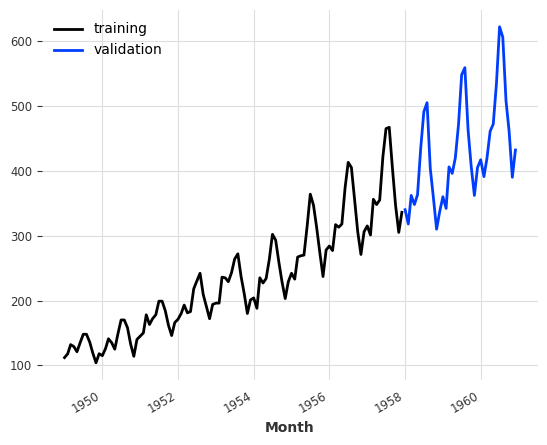

In [17]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

/Users/xmkqv/miniconda3/envs/ts310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


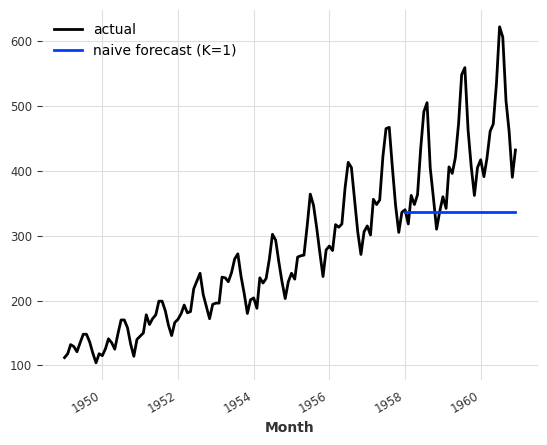

In [18]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

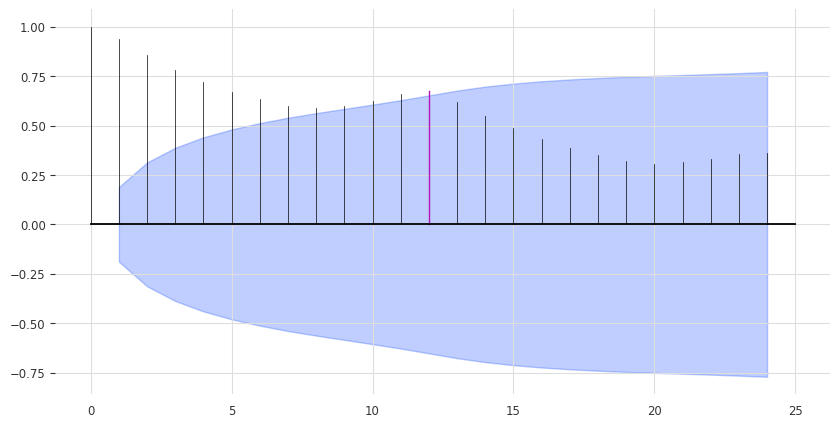

In [19]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)